# Lab 8 Report: 
## FINAL PROJECT STRATEGIC PLANNING

### Lab 8 Instruction: https://canvas.uw.edu/courses/1548925/files/92225287?wrap=1

### Team Members: Linh Truong & Sara Reyes

### Dataset for your project: Brain Tumor Dataset

---

## Understanding the Data

#### Data size and Structure
##### The data is split up into three sections. The first section is our test folder and it consists  of 60 images that our model will use to test its accuracy with. The second folder is the train_normal folder and it contains 1500 images of images with no tumors that our model will use it to train. The last folder consists of train_tumorous and it has 1500 jpegs that  have tumors in them and our model will also train with these.  A pattern we encountered with the data is that in the train_normal folder the images do  not follow a consistent numeric pattern and instead of counting up sometimes it restarts the number of jpegs. 


#### Data Cleanness
##### Some of the data was mislabeled in the train_normal folder the jpegs did not increase by one and the labeling was all over the place. Some of the data also has borders around the image or texts that could interfere with the training.


#### Diversity of Features
##### The number of pixels depends on the image but we plan on resizing every jpeg to either 200 x 200 pixels or 240 x 240 pixels. The training data that is split between the pictures with tumors and without tumors both have the same amount of jpegs.


## Understanding the Task

#### We are trying to create a NN that can classify between images that tumors on the brain scans and images that don’t have tumors. Binary classification

#### If we’re able to automate this process it would save hospitals time and money and hopefully be able to get patients a quicker result.

#### We will be testing how many images the model guesses incorrectly out of all the images, so we will be measuring training loss accuracy and testing accuracy

#### We think a good performance would be a training loss accuracy of <0.18 and a testing accuracy >90%

#### Using a CNN would be the best method for this binary classification problem in terms of performance 


## Developing an Initial Plan for Your Project

#### The inputs will be the training inputs split into a batch size of 250 and the outputs will be the raw output of fc1 with size 2

#### To prep the data we need to resize the images because they are all different sizes and also use standard scaler to scale the images

#### We plan to use a CNN

#### We will use Cross Entropy Loss for the loss function

#### We will evaluate it with training loss accuracy and testing accuracy

In [24]:
# Import necessary packages

%matplotlib inline

import matplotlib.pyplot as plt

import torch
import torchvision
import numpy as np
from PIL import Image
import os

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

from skimage import color
from skimage import io
import random

In [25]:
os.listdir("/Users/sarareyes/Dropbox/My Mac (MacBook Pro)/Downloads/tumor_diagnosis")

['train_tumorous', '.DS_Store', 'train_normal', 'test']

In [26]:
# Go into each folder and convert them all into np array
test_arr = []
# import the modules
import os
from os import listdir
 
# get the path/directory
folder_dir = "/Users/sarareyes/Dropbox/My Mac (MacBook Pro)/Downloads/tumor_diagnosis/test"
os.chdir(folder_dir)
for images in os.listdir(folder_dir):
 
    # check if the image ends with jpg
    if (images.endswith(".jpg")):
        #print(images)
        img = Image.open(images).convert('L') #convert to greyscale
        img = img.resize((200,200))
        npdata = np.array(img)
        test_arr.append(npdata)

In [27]:
train_normal = []
# get the path/directory
folder_dir = "/Users/sarareyes/Dropbox/My Mac (MacBook Pro)/Downloads/tumor_diagnosis/train_normal"
os.chdir(folder_dir)
for images in os.listdir(folder_dir):
 
    # check if the image ends with jpg
    if (images.endswith(".jpg")):
        #print(images)
        img = Image.open(images).convert('L') #convert to greyscale
        img = img.resize((200,200))
        npdata = np.array(img)
        train_normal.append(npdata)

In [28]:
train_tumorous = []
# get the path/directory
folder_dir = "/Users/sarareyes/Dropbox/My Mac (MacBook Pro)/Downloads/tumor_diagnosis/train_tumorous"
os.chdir(folder_dir)
for images in os.listdir(folder_dir):
 
    # check if the image ends with jpg
    if (images.endswith(".jpg")):
        #print(images)
        img = Image.open(images).convert('L') #convert to greyscale
        img = img.resize((200,200))
        npdata = np.array(img)
        train_tumorous.append(npdata)

In [29]:
max_pixel = []

for image in train_tumorous:
    
    max_pixel.append(image[0].max())
    

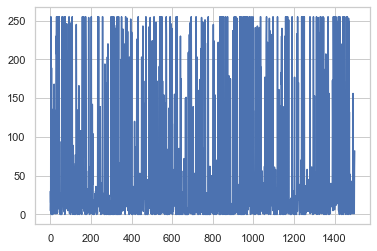

In [30]:
plt.plot(max_pixel)

In [31]:
test_arr = np.array(test_arr)
train_normal = np.array(train_normal)
train_tumorous = np.array(train_tumorous)

test_arr = test_arr.reshape(60, 200*200)
train_normal = train_normal.reshape(1500, 200*200)
train_tumorous = train_tumorous.reshape(1500, 200*200)
print(test_arr.shape)

(60, 40000)


In [32]:
scaler = MinMaxScaler()
test_arr = scaler.fit_transform(test_arr)
train_normal = scaler.fit_transform(train_normal)
train_tumorous = scaler.fit_transform(train_tumorous)

In [33]:
#targets are the 0's or 1's and the features are the actual images and we have to map them onto each other
tumorous_target = [1] * 1500 
normal_target = [0] * 1500
labels = np.concatenate((normal_target, tumorous_target))

In [34]:
test_arr = np.reshape(test_arr,(60,1,200,200))
train_normal = np.reshape(train_normal,(1500,1,200,200))
train_tumorous = np.reshape(train_tumorous,(1500,1,200,200))

In [35]:
shuffled_index = np.arange(3000)
random.shuffle(shuffled_index)

In [36]:
training_arr = np.concatenate((train_normal, train_tumorous)) # adding normal and tumorous images for training
training_arr_shuffled = training_arr[shuffled_index]
labels_shuffled = labels[shuffled_index]

In [37]:
# Take the first 300 (or randomly select 1000) training features and targets as validation set 
validation_features = training_arr_shuffled[:300]
validation_targets = labels_shuffled[:300]

# Take the remaining 2700 training features and targets as training set  
train_features = training_arr_shuffled[300:]
train_targets = labels_shuffled[300:]

### Define Model

In [38]:
# Define your CNN architecture here

class CNNModel(torch.nn.Module):
    
    def __init__(self):
        
        super(CNNModel, self).__init__()
        
        # First convolution layer (1 channel -> 16 channels, preserve original dimension by adding padding = 3)
        self.cnn1 = torch.nn.Conv2d(in_channels=1, out_channels=16, 
                              kernel_size=3, stride=1, padding=3)
        
        # First max pooling layer with kernel size = 3
        self.maxpool1 = torch.nn.MaxPool2d(kernel_size=3)
         
        # Second convolution layer (16 channel -> 32 channels, preserve dimension by adding padding = 3)
        self.cnn2 = torch.nn.Conv2d(in_channels=16, out_channels=32, 
                              kernel_size=3, stride=1, padding=3)
        
        # Second max pooling layer with kernel size = 3
        self.maxpool2 = torch.nn.MaxPool2d(kernel_size=3)
        
        # Fully connected layer that takes the flattened output of maxpool2 (32, 24 ,24) -> (800) and output 10 classes
        self.fc1 = torch.nn.Linear(32 * 24 * 24, 2) 
    
    def forward(self, x):
        
        # Note: If you are using CrossEntropyLoss() do NOT apply softmax to the final ouput 
        # since it's incorporated within the loss function

        # input image -> conv1 -> relu -> maxpool1
        conv1_out = torch.nn.functional.relu(self.cnn1(x))       
        pool1_out = self.maxpool1(conv1_out)
        
        # maxpool1 output -> conv2 -> relu -> maxpool2
        conv2_out = torch.nn.functional.relu(self.cnn2(pool1_out))    
        pool2_out = self.maxpool2(conv2_out)

        #print(pool2_out.size())
        
        # flatten the maxpool2 output to be used as input into FCN layer
        fcn_input = pool2_out.view(pool2_out.size(0), -1)
    
        # Use the raw output of the fully connected layer as the final output
        output = self.fc1(fcn_input)
        
        return output

### Select Hyperparameters

In [39]:
# Fix the random seed so that model performance is reproducible
torch.manual_seed(55)

# Initialize your CNN model

model = CNNModel()

# Define learning rate, epoch and batchsize for mini-batch gradient

learning_rate = 0.003
epochs = 10
batchsize = 250

# Define loss function and optimizer

loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

model

CNNModel(
  (cnn1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(3, 3))
  (maxpool1): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(3, 3))
  (maxpool2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=18432, out_features=2, bias=True)
)

### Identity Tracked Values

In [40]:
# Placeholders for training loss and validation accuracy during training
# Training loss should be tracked for each iteration (1 iteration -> single forward pass to the network)
# Validation accuracy should be evaluated every 'Epoch' (1 epoch -> full training dataset)
# If using batch gradient, 1 iteration = 1 epoch

train_loss_list = []
validation_accuracy_list = np.zeros((epochs,))

In [41]:
import tqdm # Use "for epoch in tqdm.trange(epochs):" to see the progress bar

# Convert the training, validation, testing dataset (NumPy arrays) into torch tensors
# Split your training features/targets into mini-batches if using mini-batch gradient

train_features = torch.from_numpy(train_features).float()
train_targets = torch.from_numpy(train_targets).long()

validation_inputs = torch.from_numpy(validation_features).float()
validation_targets = torch.from_numpy(validation_targets).long()

# Use torch.split() function to split the training inputs/targets into mini-batches
# See documentation of torch.split() https://pytorch.org/docs/stable/generated/torch.split.html
train_batches_features = torch.split(train_features, batchsize)
train_batches_targets = torch.split(train_targets, batchsize)

# length of train_batches_features = total number of mini-batches in the training set
batch_split_num = len(train_batches_features)
# Training Loop ---------------------------------------------------------------------------------------

for epoch in range(epochs):
    
        
    for k in range(batch_split_num):
    
        optimizer.zero_grad()
    
        train_batch_outputs = model(train_batches_features[k])

        loss = loss_func(train_batch_outputs, train_batches_targets[k])

        train_loss_list.append(loss.item())

        loss.backward()

        optimizer.step()

    # Compute Validation Accuracy ----------------------------------------------------------------------

    with torch.no_grad():

        validation_outputs = model(validation_inputs)

        correct = (torch.argmax(validation_outputs, dim=1) == 
                validation_targets).type(torch.FloatTensor)
        
        print("Epoch: "+ str(epoch), 
            "Validation Accuracy: " + str(np.round(correct.mean().numpy() * 100, 2)) + '%', flush=True)

        validation_accuracy_list[epoch] = correct.mean()


Epoch: 0 Validation Accuracy: 72.33%
Epoch: 1 Validation Accuracy: 78.33%
Epoch: 2 Validation Accuracy: 85.0%
Epoch: 3 Validation Accuracy: 84.67%
Epoch: 4 Validation Accuracy: 89.0%
Epoch: 5 Validation Accuracy: 92.67%
Epoch: 6 Validation Accuracy: 94.67%
Epoch: 7 Validation Accuracy: 95.0%
Epoch: 8 Validation Accuracy: 95.33%
Epoch: 9 Validation Accuracy: 96.0%


In [42]:
# convert into tensors
# reshape into like 240x 240 pixels 
test_arr = torch.from_numpy(test_arr).float()

In [51]:
# Seaborn for prettier plot

import seaborn as sns

sns.set(style = 'white', font_scale = 2)

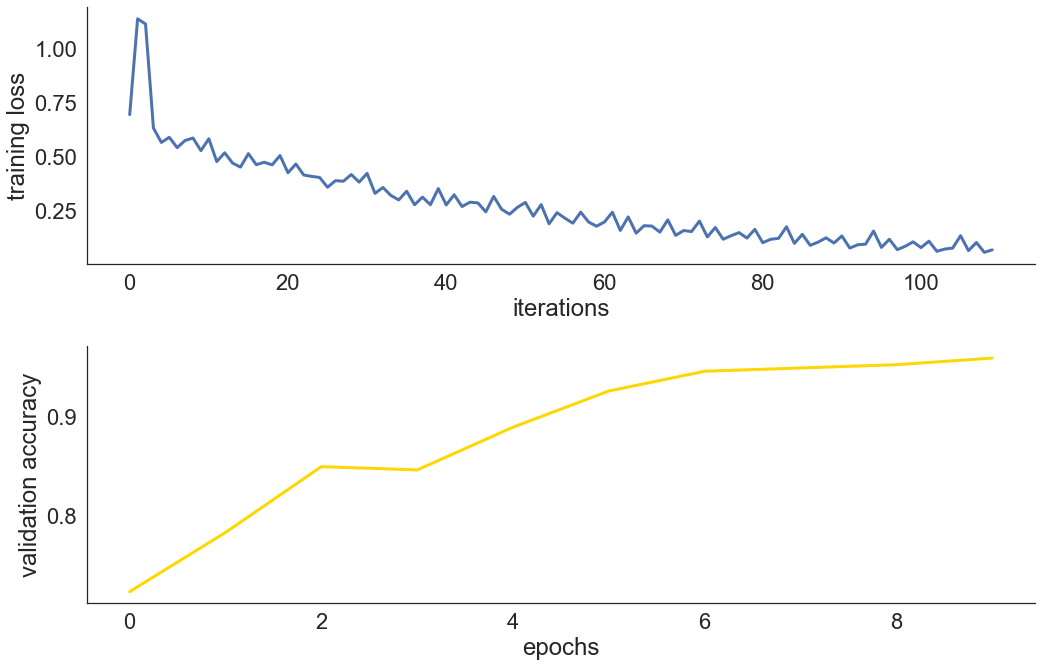

In [58]:
# Visualize training loss

plt.figure(figsize = (15, 9))

plt.subplot(2, 1, 1)
plt.plot(train_loss_list, linewidth = 3)
plt.ylabel("training loss")
plt.xlabel("iterations")
sns.despine()
plt.tight_layout()
plt.subplot(2, 1, 2)
plt.plot(validation_accuracy_list, linewidth = 3, color = 'gold')
plt.ylabel("validation accuracy")
plt.xlabel("epochs")
sns.despine()

In [54]:
with torch.no_grad(): # Activate no_grad() since we aren't performing backpropagation

    # Pass the test images (test_features) of shape (60, 1, 200, 200) into trained CNN
    # y_pred_test is (60, 2) tensor where each row is the values of 2 output neurons
    y_pred_test = model(test_arr.float())

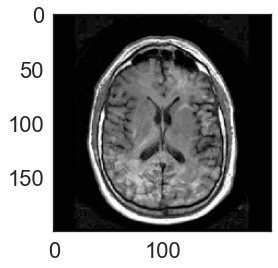

NORMAL


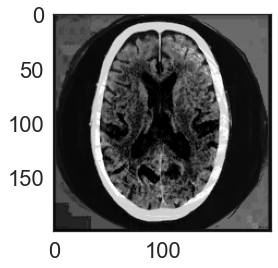

NORMAL


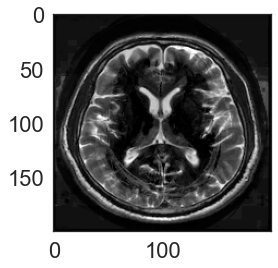

NORMAL


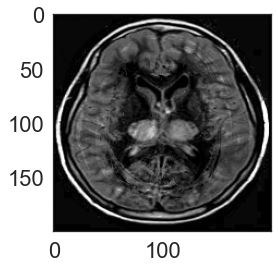

TUMOROUS


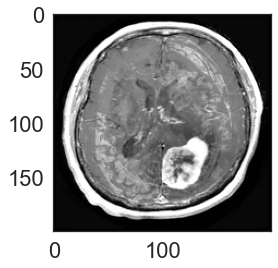

TUMOROUS


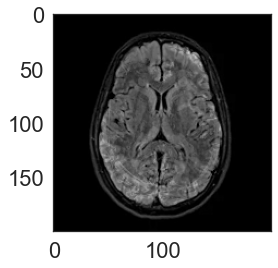

NORMAL


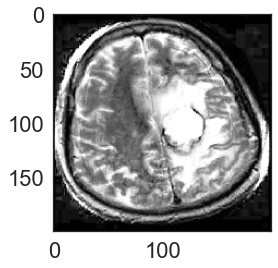

TUMOROUS


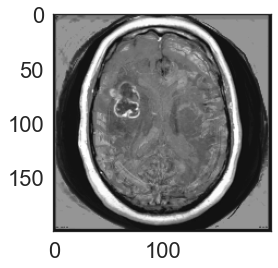

TUMOROUS


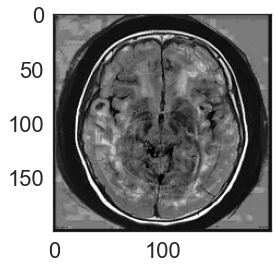

TUMOROUS


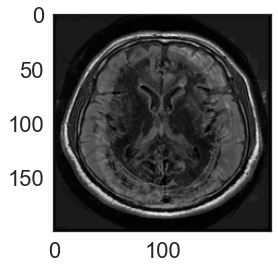

TUMOROUS


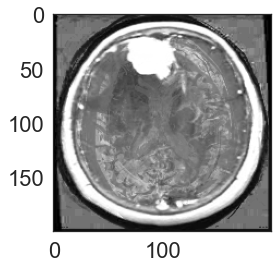

TUMOROUS


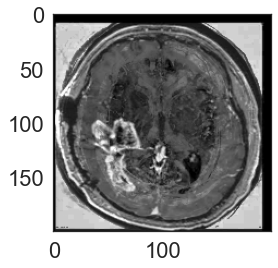

TUMOROUS


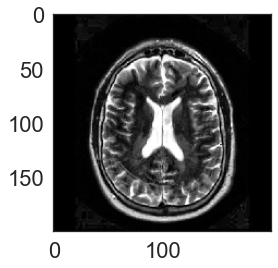

NORMAL


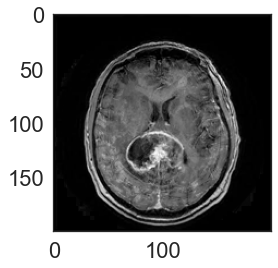

TUMOROUS


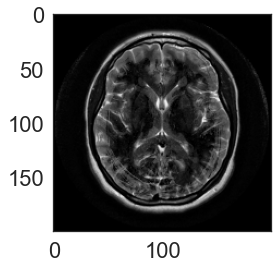

NORMAL


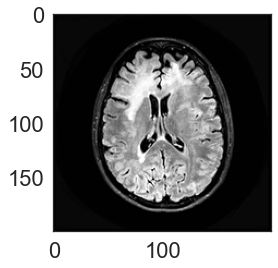

NORMAL


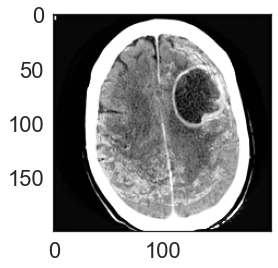

NORMAL


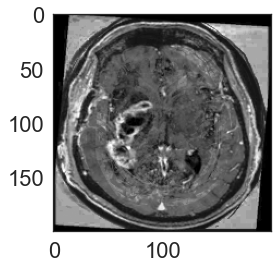

TUMOROUS


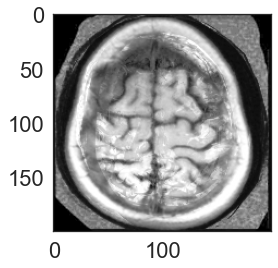

TUMOROUS


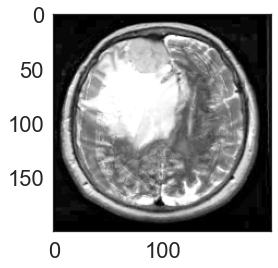

TUMOROUS


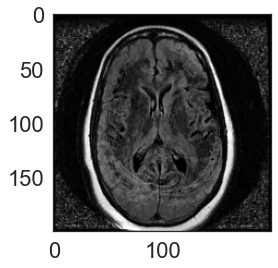

NORMAL


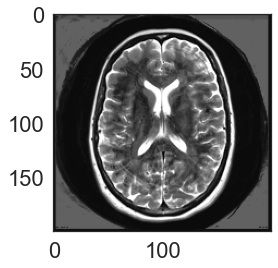

NORMAL


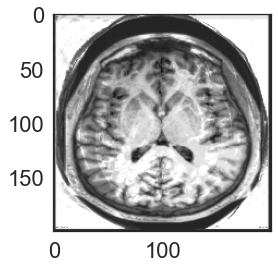

NORMAL


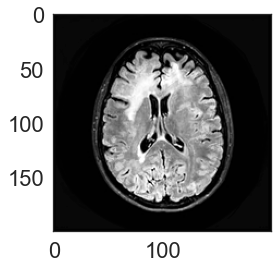

NORMAL


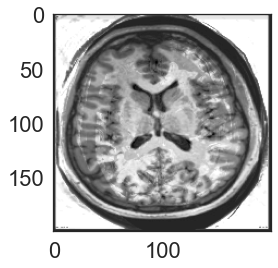

TUMOROUS


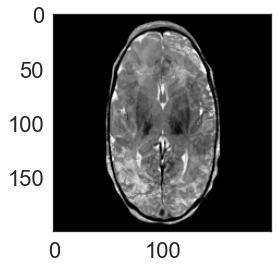

NORMAL


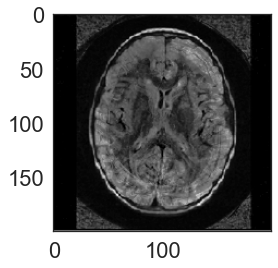

NORMAL


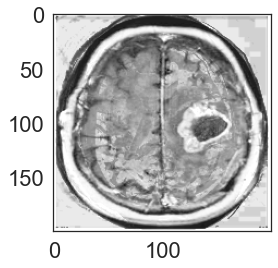

TUMOROUS


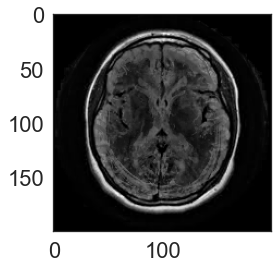

NORMAL


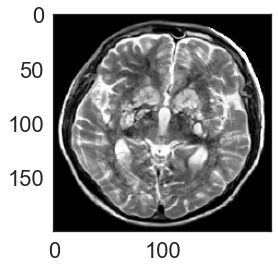

NORMAL


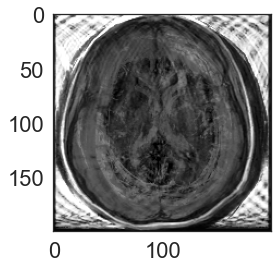

NORMAL


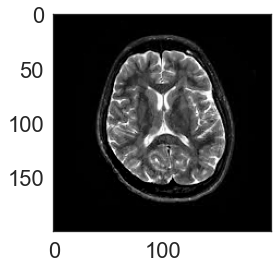

NORMAL


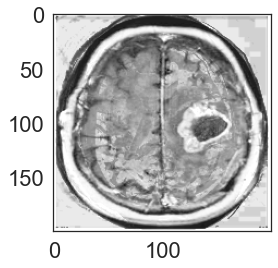

TUMOROUS


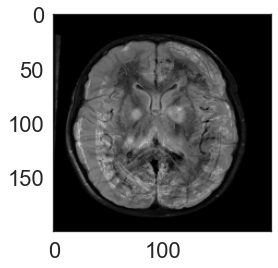

TUMOROUS


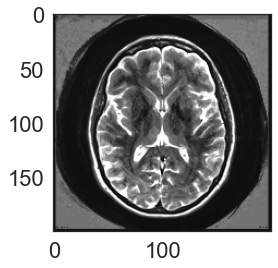

NORMAL


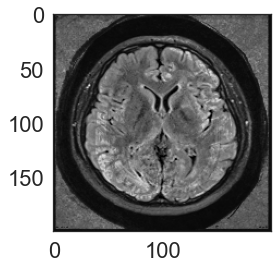

NORMAL


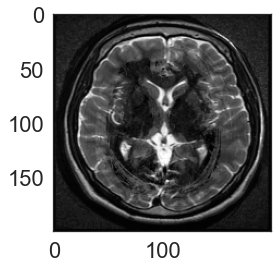

NORMAL


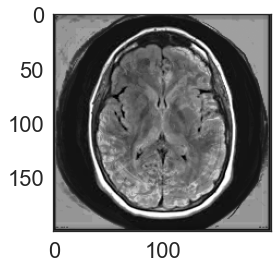

NORMAL


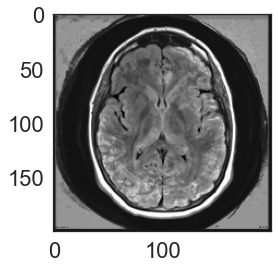

NORMAL


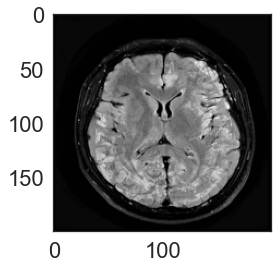

NORMAL


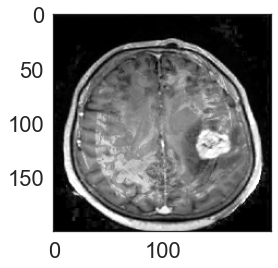

NORMAL


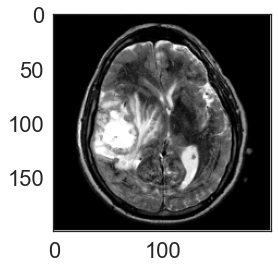

NORMAL


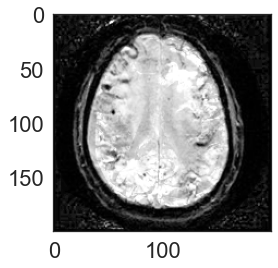

NORMAL


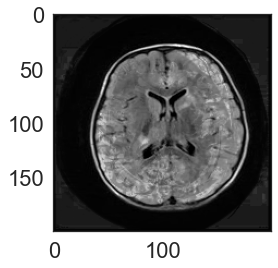

NORMAL


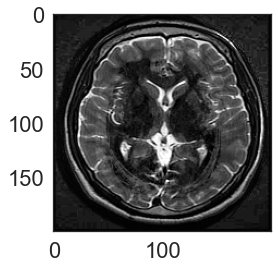

NORMAL


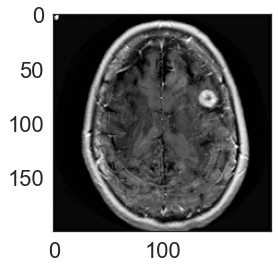

TUMOROUS


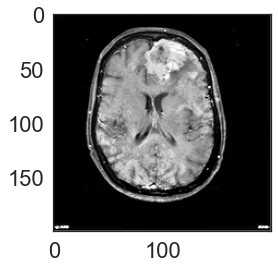

TUMOROUS


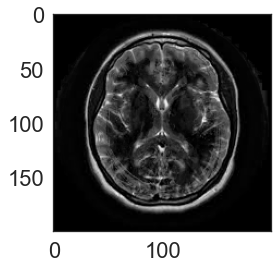

NORMAL


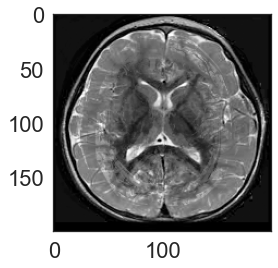

NORMAL


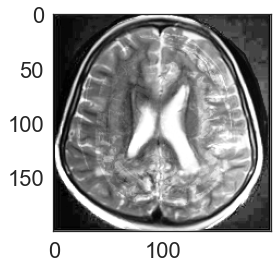

TUMOROUS


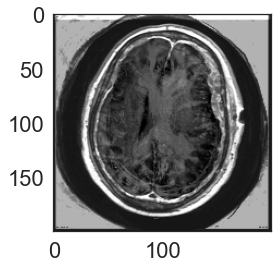

TUMOROUS


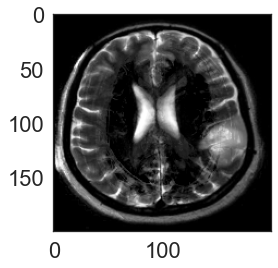

NORMAL


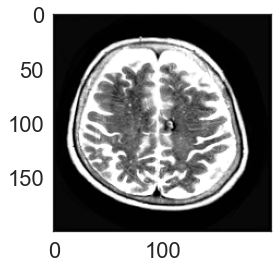

NORMAL


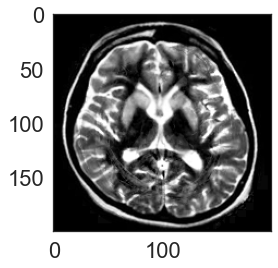

TUMOROUS


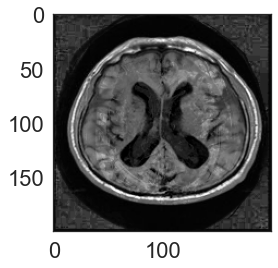

NORMAL


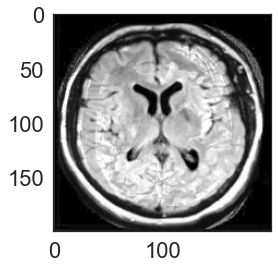

NORMAL


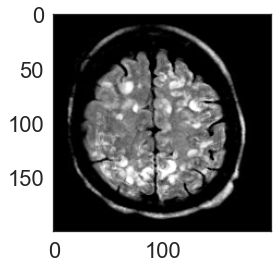

TUMOROUS


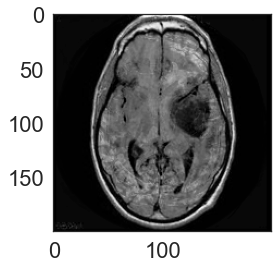

NORMAL


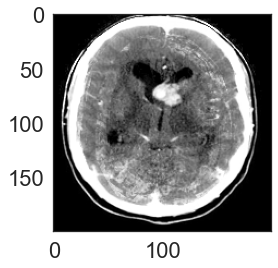

NORMAL


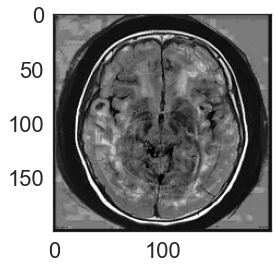

TUMOROUS


In [57]:
for index in range(len(test_arr)): # For each testing image

    # First plot each image in greyscale. torch.squeeze is necessary to make each image from (1, 200, 200) -> (200, 200)
    # Subtracting the image from 1 since somehow imshow thinks 0 is white and 1 is black. We want it other way around
    plt.imshow(1-torch.squeeze(test_arr[index]), cmap = 'Greys', vmin = 0, vmax = 1)
    plt.show()

    # For each row in y_pred_test, apply softmax to convert neuron values to probabilities
    # Apply argmax afterward to find the index of highest probability among two neurons 
    # If that index = 0 -> CNN thinks image is non-tumorous
    # if index = 1 -> tumorous
    if torch.argmax(torch.nn.functional.softmax(y_pred_test[index], dim = 0)) == 0:

        print('NORMAL')

    else:

        print('TUMOROUS')